## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [16]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','Radio']]

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x2357487a7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x23574882c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x2357488bc18>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x23574886cf8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2357487aa58>,
  <matplotlib.lines.Line2D at 0x235748bcb00>]}

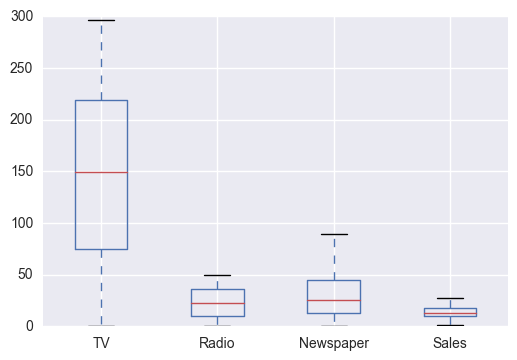

In [17]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [4]:
#plt.scatter(Fill_this_in)

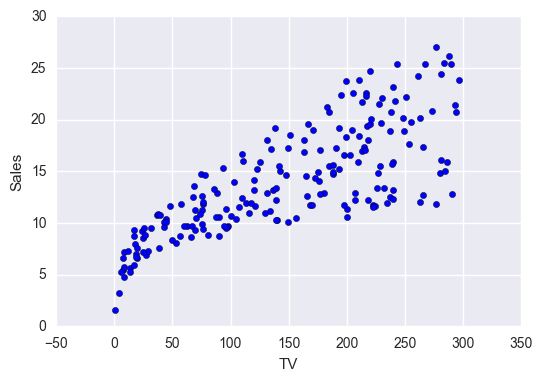

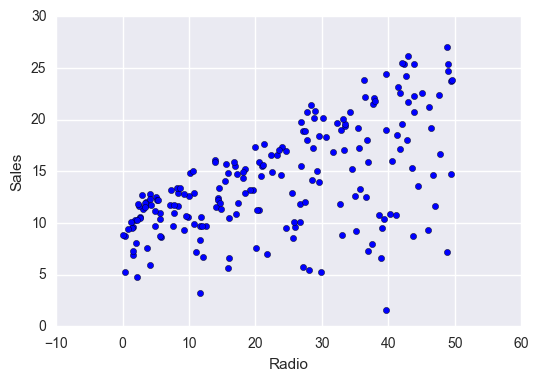

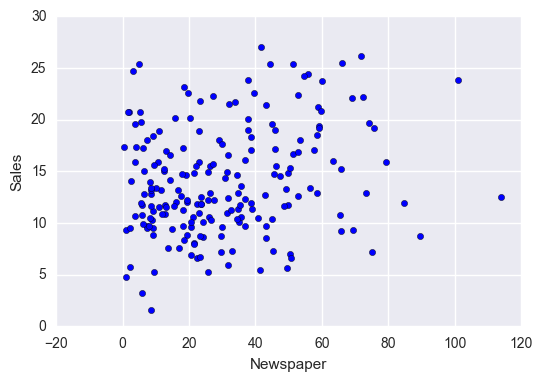

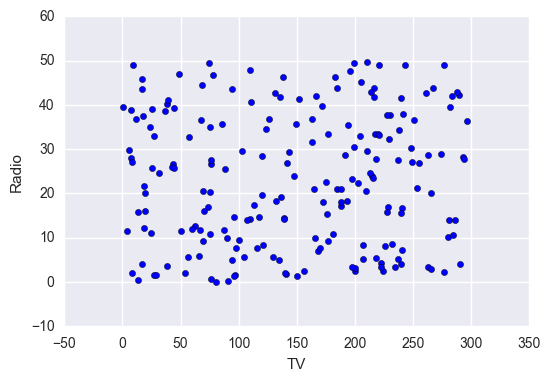

In [5]:
from pandas.tools.plotting import scatter_matrix 

plt.figure(1)
plt.scatter(df.loc[:,'TV'],df.loc[:,'Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

plt.figure(2)
plt.scatter(df.loc[:,'Radio'],df.loc[:,'Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.figure(3)
plt.scatter(df.loc[:,'Newspaper'],df.loc[:,'Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.figure(4)
plt.scatter(df.loc[:,'TV'],df.loc[:,'Radio'])
plt.xlabel('TV')
plt.ylabel('Radio')

Which of the variables seem correlated with one another? Which don't? Explain your answer

ANS: The strongest correlation is between 'Sales' and 'TV' as the is clear trend between the values in the scatter plot. The relation between 'Sales' and 'Radio' is weaker, but is also easily observable looking at the scatter plot. There is no discernible relation between 'Sales' and 'Newspaper' as the scatter plot looks nebulous with no obvious trend.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
#from sklearn.preprocessing import StandardScale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
import numpy.random as nprnd
import random
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


a) Set y to be the sales in df

In [7]:
y = df['Sales']

b) Set X to be just the features described above in df

In [8]:
x = df

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
x_train = x[0:int(200*0.8)]
x_test = x[int(200*0.8):]
y_train = y[0:int(200*0.8)]
y_test = y[int(200*0.8):]

d) Train model on training data, and make predictions on testing data

In [10]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [11]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients: 
 [  1.31524176e-17   3.43819477e-17   1.42201594e-16   1.00000000e+00]
Residual sum of squares: 0.00
Variance score: 1.00


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

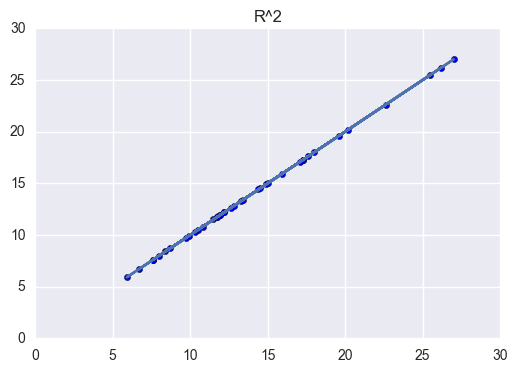

In [19]:
plt.figure
plt.title('R^2')
plt.scatter(regr.predict(x_test),y_test)
plt.plot(y_test,y_test)

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

In [14]:
# Type your answer here. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [2]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    #print ("Starting gradient descent at b = {0}, m = {1}, error = {2}").format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    #print ("After {0} iterations b = {1}, m = {2}, error = {3}").format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
        
def run_errorplot(num_iterations, learning_rate):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    #print ("Starting gradient descent at b = {0}, m = {1}, error = {2}").format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    #print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    #print ("After {0} iterations b = {1}, m = {2}, error = {3}").format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    error =  compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations, error)

Running...


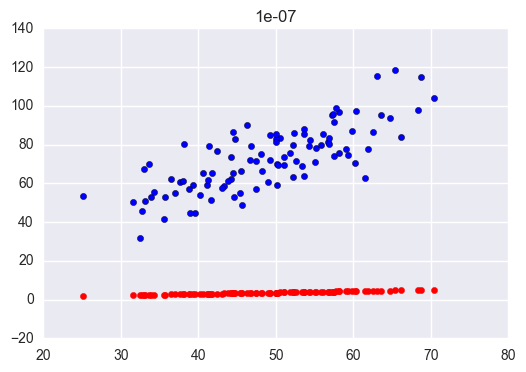

Running...


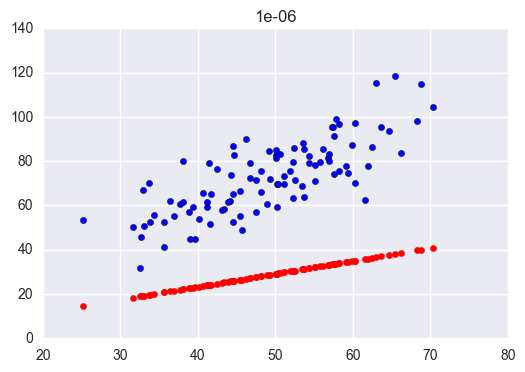

Running...


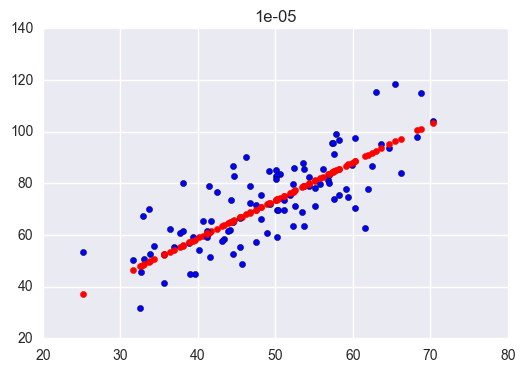

Running...


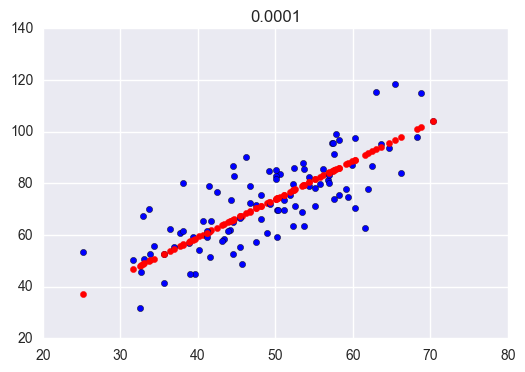

Running...


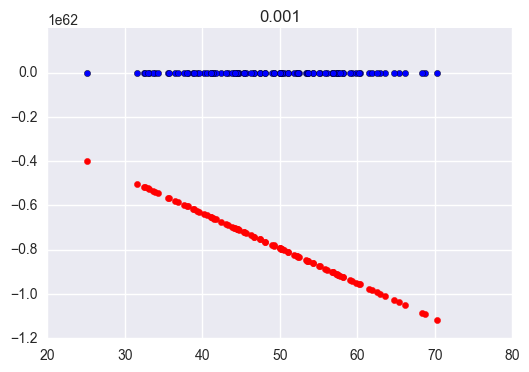

Running...


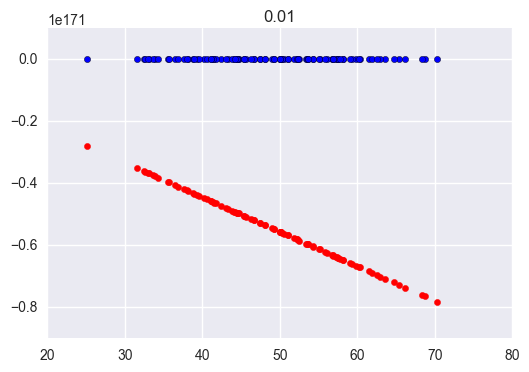

In [65]:
rate = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]
for learning_rate in rate:
    run(100, learning_rate)
    plt.title(learning_rate)
    plt.show()

Running...


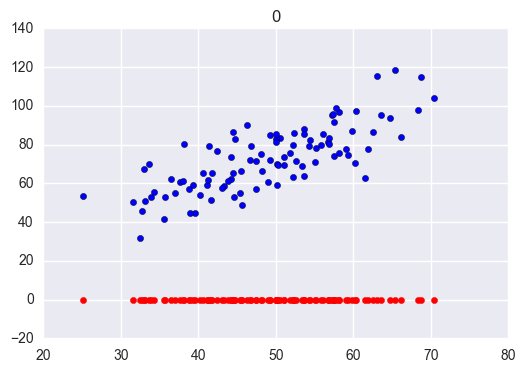

Running...


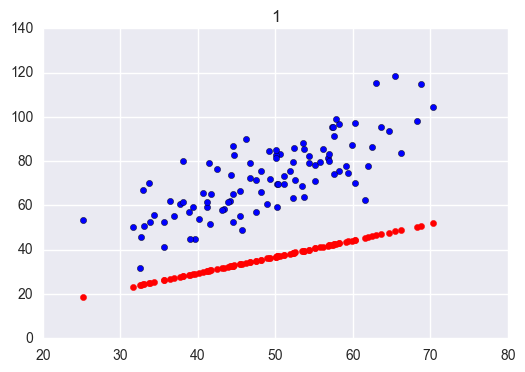

Running...


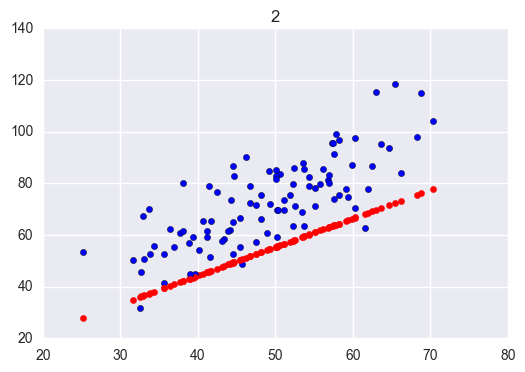

Running...


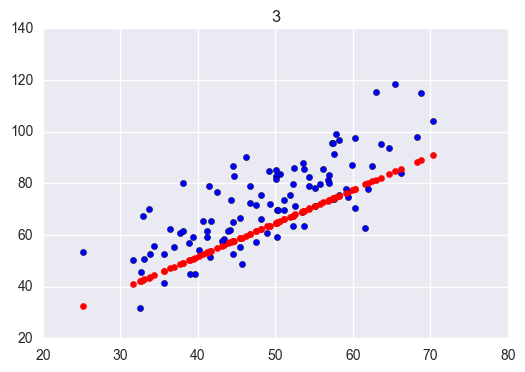

Running...


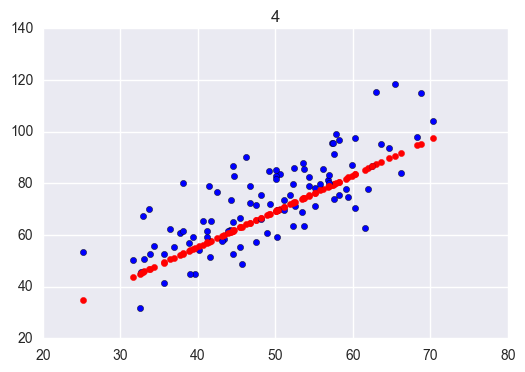

Running...


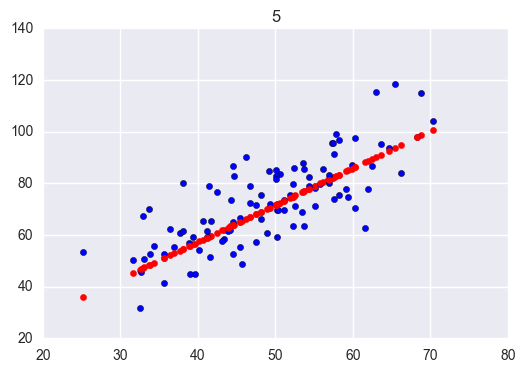

Running...


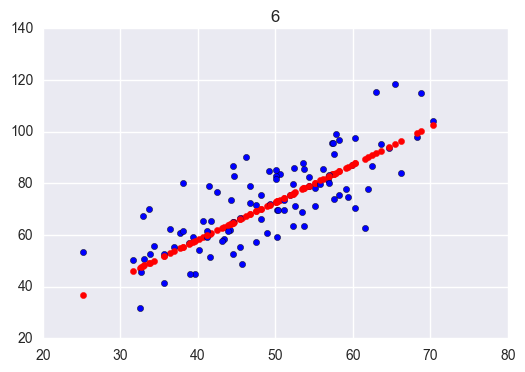

Running...


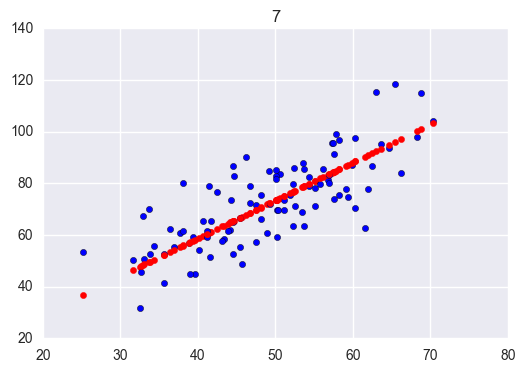

Running...


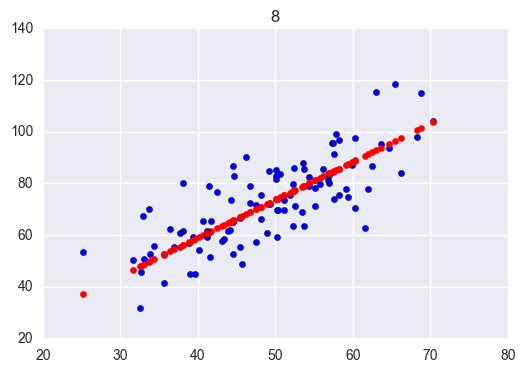

Running...


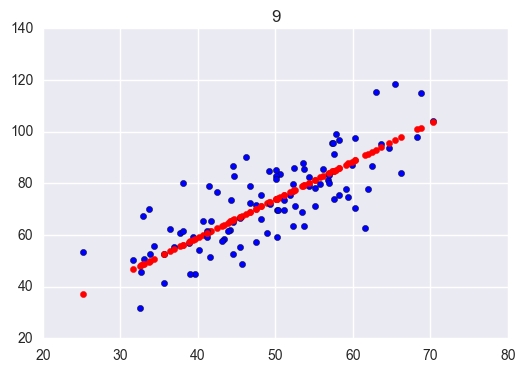

In [62]:
# Use this to visually discuss convergence rate based on learning rate

#for num in range(0,10):
#    run(num)
#    plt.show()

for num in range(0,10):
    run(num, 0.0001)
    plt.title(num)
    plt.show()

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

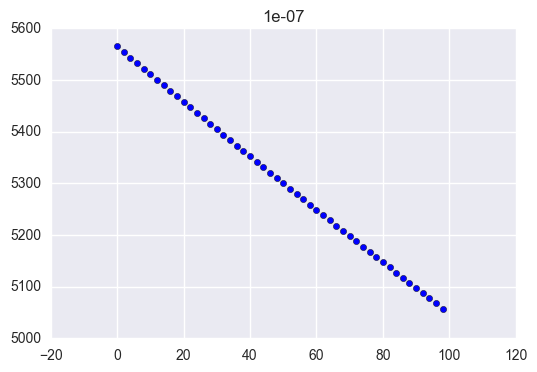

In [28]:
#Learning rate = 0.0000001
Learning_rate = 0.0000001
for num in range(0,100,2):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)       

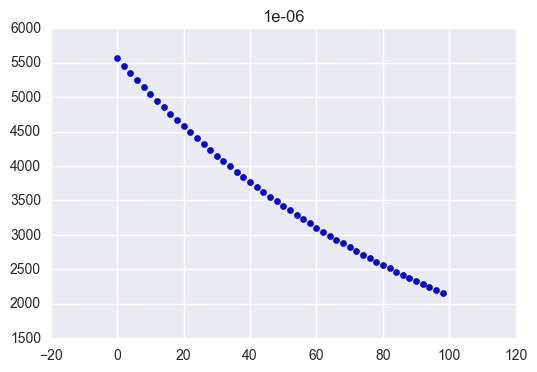

In [29]:
#Learning rate = 0.000001
Learning_rate = 0.000001
for num in range(0,100,2):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)

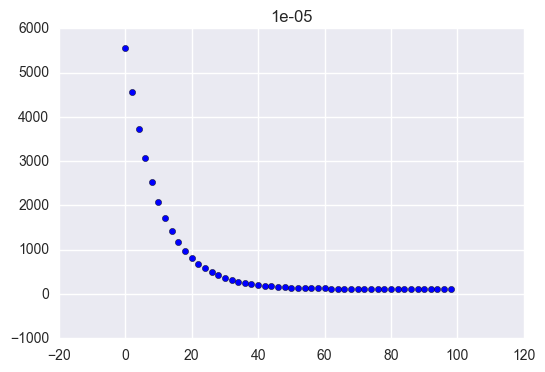

In [31]:
#Learning rate = 0.00001
Learning_rate = 0.00001
for num in range(0,100,2):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)

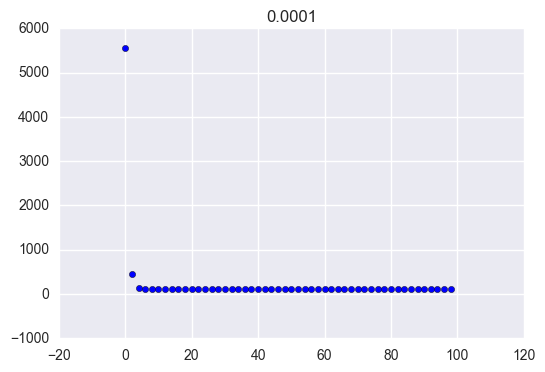

In [32]:
#Learning rate = 0.0001
Learning_rate = 0.0001
for num in range(0,100,2):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)

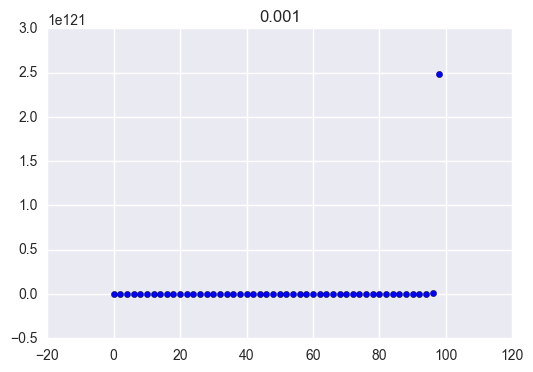

In [35]:
#Learning rate = 0.001
Learning_rate = 0.001
for num in range(0,100,2):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)